In [ ]:
import tensorflow as tf
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras.applications import *
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.utils import load_img


In [ ]:
!pip install keras

In [ ]:
!pip install tensorflow

In [ ]:

lt = [cv2.ROTATE_180,cv2.ROTATE_90_COUNTERCLOCKWISE,cv2.ROTATE_90_CLOCKWISE]
def brightness(img):
    value = random.uniform(0.5, 2)
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    hsv = np.array(hsv, dtype = np.float64)
    hsv[:,:,1] = hsv[:,:,1]*value
    hsv[:,:,1][hsv[:,:,1]>255] = 255
    hsv[:,:,2] = hsv[:,:,2]*value
    hsv[:,:,2][hsv[:,:,2]>255]= 255
    hsv = np.array(hsv, dtype = np.uint8)
    img = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    return img

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pathlib
import glob
directory=pathlib.Path("/content/drive/MyDrive/Casting")
resultant="/content/augmentedimages"
items=os.listdir(directory)
classes=[]
count=0
images=[]
labels=[]
for i in items:
    i1=0
    print(i)
    classes.append(i)
    path1=f"{directory}/{i}"
    a=random.randint(5,10)
    img=cv2.imread(path1)
    img=cv2.resize(img,(224,224))
    k=i.split(".")[0]
    cv2.imwrite(f"{resultant}\{k}{i1}.png",img)

    i1+=1
    while a!=0:
      img=cv2.rotate(img,lt[random.randint(0,2)])
      images.append(img)
      cv2.imwrite(f"{resultant}\{k}{i1}.png",img)
      i1+=1
      labels.append(count)
      if a%2==0:
        img = brightness(img)
        images.append(img)
        cv2.imwrite(f"{resultant}\{k}{i1}.png",img)
        i1+=1
        labels.append(count)
      a-=1
    count+=1
images=np.array(images)
labels=np.array(labels)

cast_ok.jpg.jpeg
cast_def.jpg.jpeg


In [ ]:
images.shape

(16, 224, 224, 3)

In [ ]:
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet import ResNet101, preprocess_input


In [ ]:
model=ResNet101(weights="imagenet")
for i in model.layers:
    i.trainable=False

179648224/179648224 [==============================] - 1s 0us/step


In [ ]:
len(model.layers)

347

In [ ]:
model.summary()

Model: "resnet101"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                      

In [ ]:
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Sequential

transferResNet101 = Sequential()


transferResNet101.add(model)
transferResNet101.add(Flatten())
transferResNet101.add(Dense(2048, activation="relu"))
transferResNet101.add(Dense(1024, activation="relu"))
transferResNet101.add(Dense(10, activation="softmax"))


In [ ]:
transferResNet101.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet101 (Functional)      (None, 1000)              44707176  
                                                                 
 flatten_1 (Flatten)         (None, 1000)              0         
                                                                 
 dense_3 (Dense)             (None, 2048)              2050048   
                                                                 
 dense_4 (Dense)             (None, 1024)              2098176   
                                                                 
 dense_5 (Dense)             (None, 10)                10250     
                                                                 
Total params: 48865650 (186.41 MB)
Trainable params: 4158474 (15.86 MB)
Non-trainable params: 44707176 (170.54 MB)
_________________________________________________________________


In [ ]:
import tensorflow as tf
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    print("call")
    if(logs.get('accuracy')>.99):
      print("\nReached %2.2f%% accuracy, so stopping training"%(99))
      self.model.stop_training=True
callbacks=myCallback()

In [ ]:
#new model summary
transferResNet101.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
transferResNet101.fit(images,labels,epochs=100,callbacks=[callbacks])

Epoch 1/100
1/1 [==============================] - 13s 13s/step - loss: 2.3037 - accuracy: 0.0000e+00
Epoch 2/100
1/1 [==============================] - 5s 5s/step - loss: 2.1427 - accuracy: 0.7500
Epoch 3/100
1/1 [==============================] - 6s 6s/step - loss: 1.9871 - accuracy: 0.7500
Epoch 4/100
1/1 [==============================] - 7s 7s/step - loss: 1.8049 - accuracy: 0.7500
Epoch 5/100
1/1 [==============================] - 10s 10s/step - loss: 1.5936 - accuracy: 0.7500
Epoch 6/100
1/1 [==============================] - 11s 11s/step - loss: 1.3628 - accuracy: 0.7500
Epoch 7/100
1/1 [==============================] - 9s 9s/step - loss: 1.1304 - accuracy: 0.7500
Epoch 8/100
1/1 [==============================] - 7s 7s/step - loss: 0.9208 - accuracy: 0.7500
Epoch 9/100
1/1 [==============================] - 4s 4s/step - loss: 0.7562 - accuracy: 0.7500
Epoch 10/100
1/1 [==============================] - 4s 4s/step - loss: 0.6450 - accuracy: 0.7500
Epoch 11/100
1/1 [===========

In [ ]:
transferResNet101.evaluate(images,labels)

1/1 [==============================] - 7s 7s/step - loss: 0.2377 - accuracy: 1.0000


[0.23769062757492065, 1.0]

In [ ]:
def predict(i,transferResNet101,labels):
  path1=f"{directory}/{i}"
  img=cv2.imread(path1)
  img=cv2.resize(img,(224,224))
  a=np.argmax(transferResNet101.predict(np.array([img])))
  img=cv2.putText(img,labels[a],(25,25),cv2.FONT_HERSHEY_SIMPLEX,1,(225,225,0),3,cv2.LINE_AA)
  plt.imshow(img)
  classes=["cast_ok.jpg","cast_def.jpg"]

1/1 [==============================] - 4s 4s/step


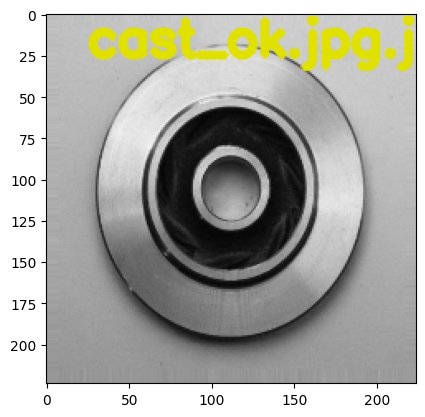

In [ ]:
predict("cast_ok.jpg.jpeg",transferResNet101,classes)

1/1 [==============================] - 0s 498ms/step


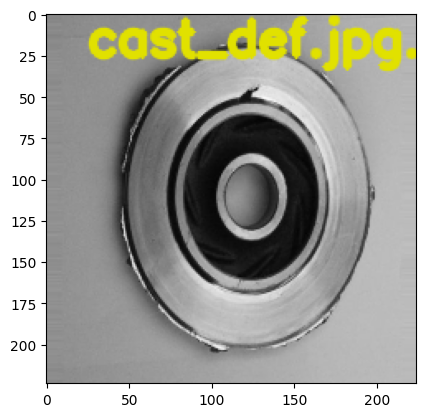

In [ ]:
predict("cast_def.jpg.jpeg",transferResNet101,classes)